#import liberaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read dataset

In [ ]:
!kaggle datasets download -d rabieelkharoua/predict-restaurant-menu-items-profitability

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-restaurant-menu-items-profitability
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/6.53k [00:00<?, ?B/s]
100% 6.53k/6.53k [00:00<00:00, 8.50MB/s]


In [ ]:
!unzip predict-restaurant-menu-items-profitability.zip

Archive:  predict-restaurant-menu-items-profitability.zip
  inflating: restaurant_menu_optimization_data.csv  


In [ ]:
df = pd.read_csv('restaurant_menu_optimization_data.csv')
df.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
df.isnull().sum()

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64

In [ ]:
df.drop_duplicates( inplace = True)

In [ ]:
df.shape

(973, 6)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,973.0,12.965971,7.403722,2.01,4.96,12.69,17.8,29.84


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
RestaurantID,973,3,R001,343
MenuCategory,973,4,Desserts,253
MenuItem,973,16,New York Cheesecake,70
Ingredients,973,4,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",253
Profitability,973,3,Medium,478


In [ ]:
df.columns

Index(['RestaurantID', 'MenuCategory', 'MenuItem', 'Ingredients', 'Price',
       'Profitability'],
      dtype='object')

#data visualization

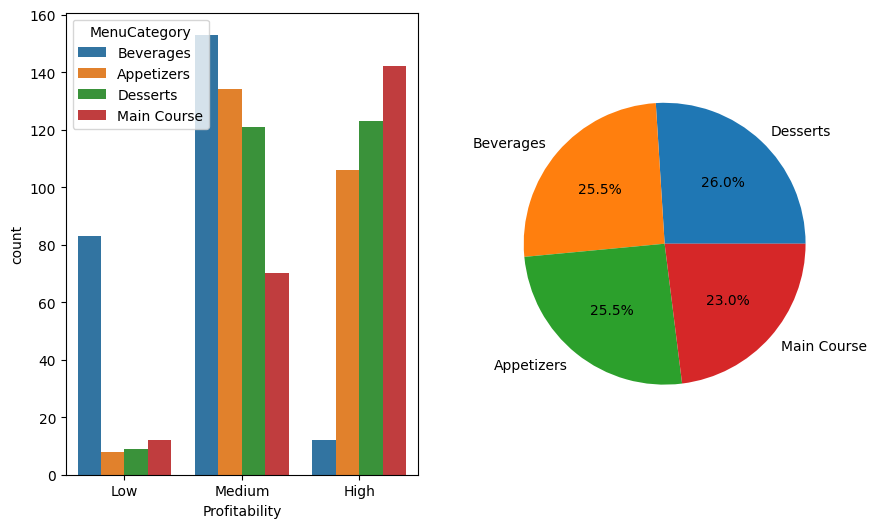

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[1].pie(df['MenuCategory'].value_counts().values,
          labels = df['MenuCategory'].value_counts().index,
          autopct = '%1.1f%%')

sns.countplot(data=df, x='Profitability', hue='MenuCategory', ax = ax[0])

plt.show()

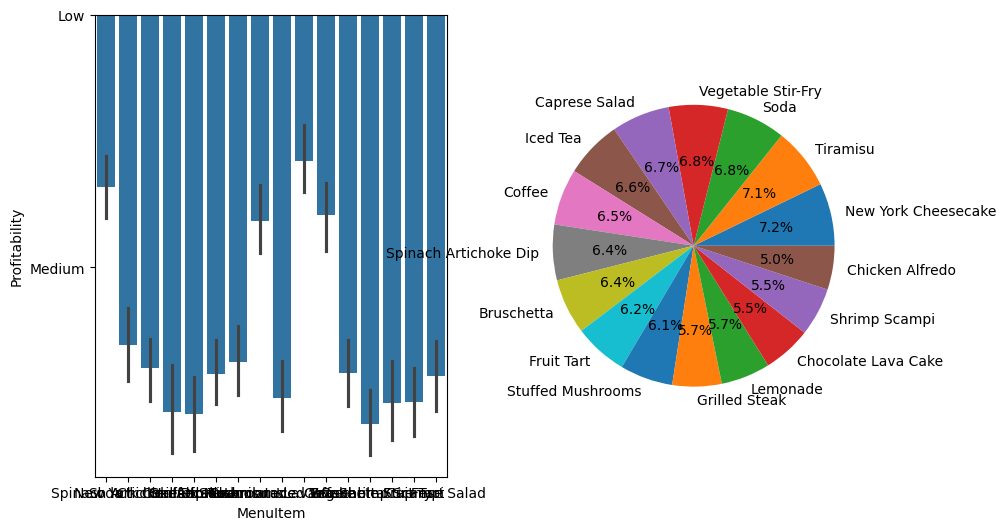

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))

ax[1].pie(df['MenuItem'].value_counts().values,
       labels = df['MenuItem'].value_counts().index,
       autopct = '%1.1f%%')

sns.barplot(data=df, x='MenuItem', y='Profitability', ax = ax[0])
plt.show()

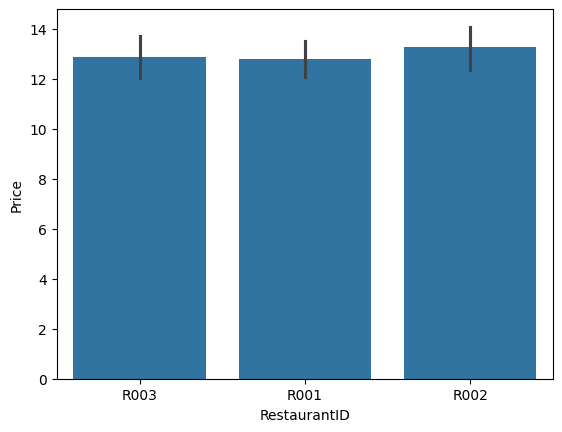

In [ ]:
sns.barplot(data=df, x='RestaurantID', y='Price')
plt.show()

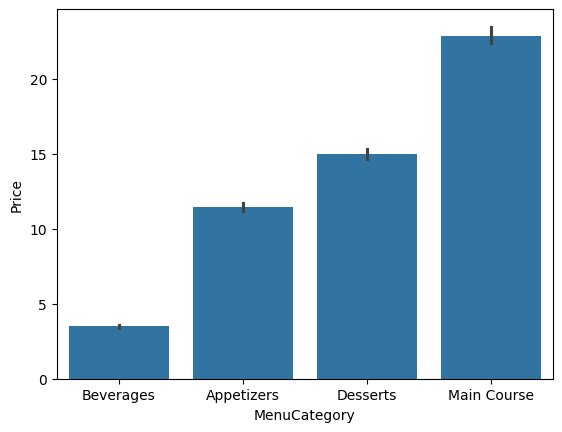

In [ ]:
sns.barplot(data=df, x='MenuCategory', y='Price')
plt.show()

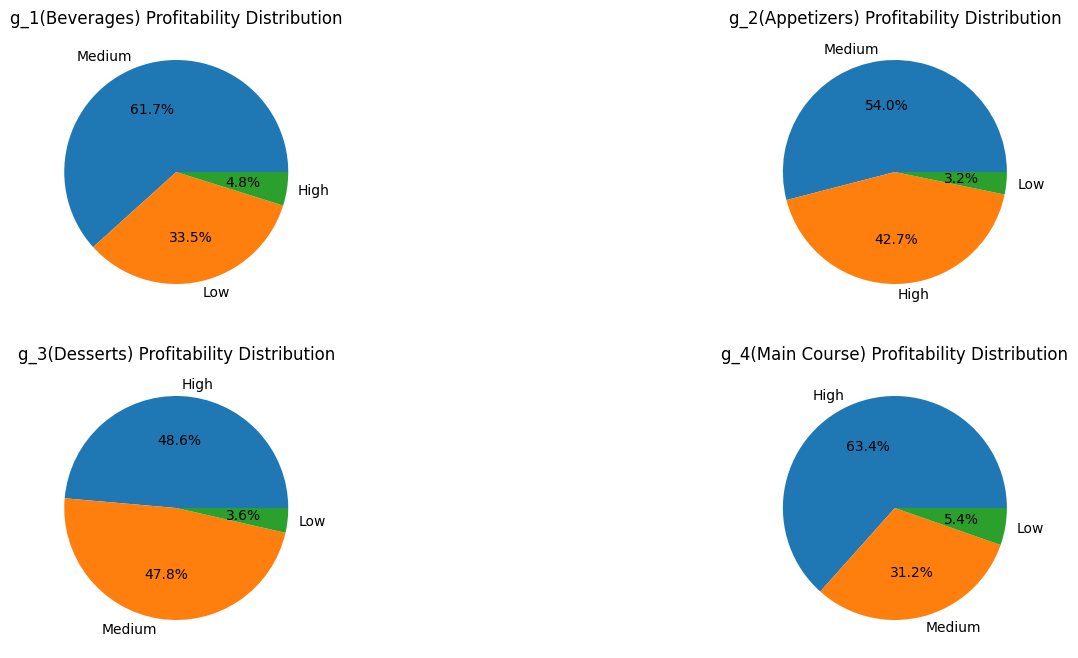

In [ ]:
# Profitability

fig , ax = plt.subplots(2 , 2 , figsize = (17 , 8))

# Assuming you want to plot Profitability for each unique MenuCategory
for i, category in enumerate(df['MenuCategory'].unique()):
    row = i // 2
    col = i % 2

    data = df[df['MenuCategory'] == category]['Profitability'].value_counts()
    ax[row][col].pie(data , labels = data.index , autopct = '%1.1f%%')
    ax[row][col].set_title(f"g_{i + 1}({category}) Profitability Distribution")

plt.show()

#encode data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['MenuCategory'] = le.fit_transform(df['MenuCategory'])
df['Profitability'] = le.fit_transform(df['Profitability'])
df['RestaurantID'] = le.fit_transform(df['RestaurantID'])
df['MenuItem'] = le.fit_transform(df['MenuItem'])
df['Ingredients'] = le.fit_transform(df['Ingredients'])

#building model

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop('Profitability', axis=1)
y = df['Profitability']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.metrics import f1_score , classification_report

model = xgb.XGBClassifier()

model.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
print(f"train data r2 : {model.score(x_train , y_train)}")
print(f"test data r2 : {model.score(x_test , y_test)}")

y_pred = model.predict(x_test)

print(classification_report(y_test , y_pred))

train data r2 : 0.9884318766066839
test data r2 : 0.8512820512820513
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        77
           1       0.54      0.62      0.58        21
           2       0.93      0.91      0.92        97

    accuracy                           0.85       195
   macro avg       0.77      0.79      0.78       195
weighted avg       0.86      0.85      0.85       195

